# Titanic: Machine Learning from Disaster

# Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# Business Problem:

To apply the tools of machine learning to predict which passengers survived the tragedy.

# Data

Taken data from : https://www.kaggle.com/c/titanic/data

# Business objectives and Constraints

**Objectives:**
<br/>
To predict which passengers survived the tragedy

**Constraints: **
<br/>
Latency : Not required <br/>
Interpretability :  It is good to have an uderstanding behind the passengers survival<br/>

# Machine Learning Problem :

It is a classification Problem  
Survived - 1,Not survived - 0

# Performance metrics :

Accuracy   
Confusion matrix  

# Features of the data:

**survival** : Survival	0 = No, 1 = Yes  
**PassengerId** : Unique ID given to each and every passenger  
**Name** : the name of the passenger  
**pclass** : A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower  
**sex** : Sex	
**Age**	: Age in years	(Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)  
**sibsp** :	 siblings(brother, sister, stepbrother, stepsister)/ spouses(husband, wife (mistresses and fiancés were ignored)) aboard the Titanic	
**parch** : parents(mother, father) / children(daughter, son, stepdaughter, stepson) aboard the Titanic	/Some children travelled only with a nanny, therefore parch=0 for them.  
**ticket** : Ticket number	
**fare** : Passenger fare	
**cabin** : Cabin number	
**embarked** : Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Libraries

In [216]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from keras.initializers import RandomNormal
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

# Load Data

In [270]:
train_data = pd.read_csv(r'C:\Users\Friend\AI\AI_datasets\Titanic\train.csv')
train_data.shape

(891, 12)

In [74]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv(r'C:\Users\Friend\AI\AI_datasets\Titanic\test.csv')
test_data.shape

(418, 11)

In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis:

In [12]:
#columns of the data

train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

** Observations: **

* Independent Variable - PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
* Dependent variable - Survived

In [13]:
#Datatypes of each Column

train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
#Statistical Analysis of features

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
# Checking attribute values in PassengerId
print('length of unique values in PassengerId',len(set(train_data['PassengerId'])))
print('some of the unique values in PassengerId',list(set(train_data['PassengerId']))[0:5])
print('---------------------------------------------------------')

# Checking attribute values in Pclass
print('length of unique values in Pclass',len(set(train_data['Pclass'])))
print('unique values in Pclass',set(train_data['Pclass']))
print('---------------------------------------------------------')

# Checking attribute values in Name
print('length of unique values in Name',len(set(train_data['Name'])))
print('length of unique values in Name',len(set(train_data['Name'])))
print('---------------------------------------------------------')

# Checking attribute values in Sex
print('length of unique values in Sex',len(set(train_data['Sex'])))
print('unique values in Sex',set(train_data['Sex']))
print('---------------------------------------------------------')

# Checking attribute values in Age
print('length of unique values in Age',len(set(train_data['Age'])))
print('some of the unique values in Age',list(set(train_data['Age']))[0:5])
print('---------------------------------------------------------')

# Checking attribute values in SibSp
print('length of unique values in SibSp',len(set(train_data['SibSp'])))
print('unique values in SibSp',set(train_data['SibSp']))
print('---------------------------------------------------------')

# Checking attribute values in Parch
print('length of unique values in Parch',len(set(train_data['Parch'])))
print('unique values in Parch',set(train_data['Parch']))
print('---------------------------------------------------------')

# Checking attribute values in Ticket
print('length of unique values in Ticket',len(set(train_data['Ticket'])))
print('some of the unique values in Ticket',list(set(train_data['Ticket']))[0:5])
print('---------------------------------------------------------')

# Checking attribute values in Fare
print('length of unique values in Fare',len(set(train_data['Fare'])))
print('some of the unique values in Fare',list(set(train_data['Fare']))[0:5])
print('---------------------------------------------------------')

# Checking attribute values in Cabin
print('length of unique values in Cabin',len(set(train_data['Cabin'])))
print('some of the unique values in Cabin',list(set(train_data['Cabin']))[0:5])
print('---------------------------------------------------------')

# Checking attribute values in Embarked
print('length of unique values in Embarked',len(set(train_data['Embarked'])))
print('unique values in Embarked',set(train_data['Embarked']))
print('---------------------------------------------------------')

# Checking attribute values in Survived
print('length of unique values in Survived',len(set(train_data['Survived'])))
print('unique values in Survived',set(train_data['Survived']))

length of unique values in PassengerId 891
some of the unique values in PassengerId [1, 2, 3, 4, 5]
---------------------------------------------------------
length of unique values in Pclass 3
unique values in Pclass {1, 2, 3}
---------------------------------------------------------
length of unique values in Name 891
length of unique values in Name 891
---------------------------------------------------------
length of unique values in Sex 2
unique values in Sex {'male', 'female'}
---------------------------------------------------------
length of unique values in Age 265
some of the unique values in Age [nan, nan, 2.0, nan, 4.0]
---------------------------------------------------------
length of unique values in SibSp 7
unique values in SibSp {0, 1, 2, 3, 4, 5, 8}
---------------------------------------------------------
length of unique values in Parch 7
unique values in Parch {0, 1, 2, 3, 4, 5, 6}
---------------------------------------------------------
length of unique values i

** Observations: **

   * Independent variables:
       * PassengerId : Discrete value;unique identifier for each record in dataset
       * Pclass : Categorical(Ordinal)
       * Name : Text(unique)
       * Sex : Categorical(Nominal)
       * Age : Numeric(Continuous)
       * SibSp : Numeric(Discrete)
       * Parch : Numeric(Discrete)
       * Ticket : Text(Not unique)
       * Fare : Numeric(Continuous)
       * Cabin : Categorical(Nominal)
       * Embarked : Categorical(Nominal)
   * Dependent Variable:
       * Survived : Numeric(Discrete)

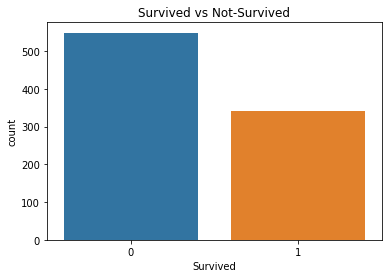

In [271]:
# Distribution of output

sns.countplot(x ="Survived", data = train_data)
plt.title("Survived vs Not-Survived")
plt.show()

In [40]:
# Analysing Columns having missing/null vlaues

null_values = train_data.isnull().sum()
print(null_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


** Observations: **
We see that apart from Age,Cabin and Embarked we do not have missing values in any other column.

percent of data missing 19.865319865319865


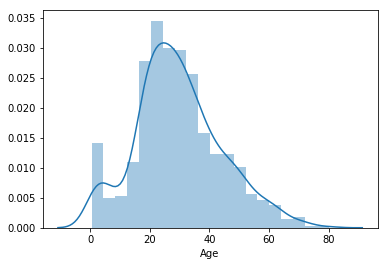

In [84]:
# Analysing Age Column
print('percent of data missing',train_data['Age'].isnull().sum()*100/train_data.shape[0])

# Checking the distribution of Age
data = train_data[train_data['Age'].notnull()]['Age']
sns.distplot(data)
plt.show()

**Observations:**Seems like Age column distribution is symmetric about mean with little noise,hence it would be good to replace it with median.

In [85]:
# Analysing Cabin Column
print('percent of data missing',train_data['Cabin'].isnull().sum()*100/train_data.shape[0])

percent of data missing 77.10437710437711


**Observations:** Seems like cabin data has lot of missing  values,hence it is better that we drop it.

In [57]:
# Analysing Embarked Column
print(train_data['Embarked'].value_counts(dropna=False))

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


**Observations:** Found 2 null value in Embarked column,it could be better to replace them with the mode of the column.

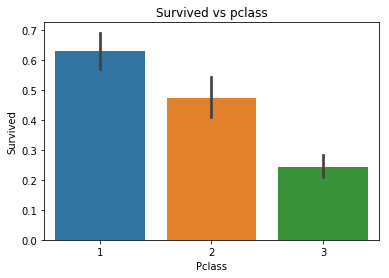

In [89]:
# Analysis on pclass

sns.barplot(x="Pclass", y="Survived", data = train_data)
plt.title("Survived vs pclass")
plt.show()

**Observation:**   

From the barplot it is evident that
1. Above 60% of 1st class people has survived.
2. Around 45% of 2nd class people has survived.
3. Around 30% of 3rd calss people has survived.

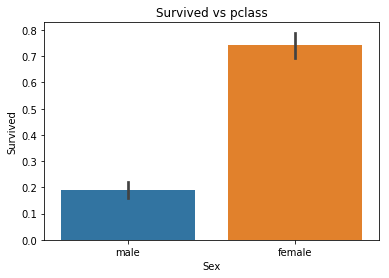

In [91]:
# Analysis on Sex

sns.barplot(x="Sex", y="Survived", data = train_data)
plt.title("Survived vs pclass")
plt.show()

**Observations:**  

From the barplot it is evident that

1. Around 70% to 80% of people who has survived are females.
2. Around 20 % of the people being males has survived.

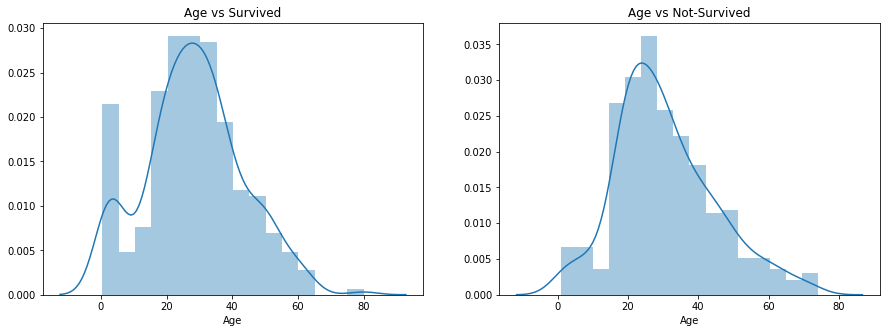

In [100]:
# Analysis on Age

data = train_data[train_data['Age'].notnull()]
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(data[data.Survived  == 1]['Age'])
plt.title('Age vs Survived')
plt.subplot(1, 2, 2)
sns.distplot(data[data.Survived  == 0]['Age'])
plt.title('Age vs Not-Survived')
plt.show()

**Observations:** Nothing information to be drawn from age,since both survived and not-survived gives similar plots except that there is a difference in the shape at the range of 0 to 10.Seems like children have survived more.

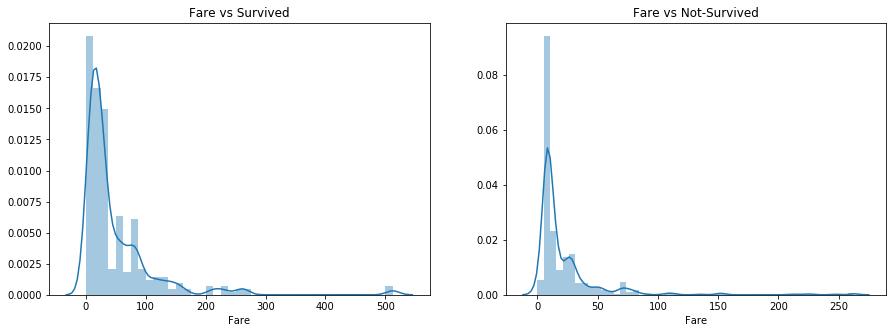

In [106]:
# Analysis on Fare

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(train_data[train_data.Survived  == 1]['Fare'])
plt.title('Fare vs Survived')
plt.subplot(1, 2, 2)
sns.distplot(train_data[train_data.Survived  == 0]['Fare'])
plt.title('Fare vs Not-Survived')
plt.show()

**Observations:**

From the plot it is clear that
1. Only 2% of people who have survived has a fare within 50 dollars.
2. About 8% of people has not survived who has same fare.

In [108]:
# Checking correlations between features.

train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Observations:**

1. Positive correlation  :  Fare,Parch
2. Negative correlation  :  Pclass,Age,SibSp,PassengerId
3. Fare vs Survived  :  Positive correlation indicating an increase in fare will increase the chances of survival
4. Parch vs Survived  :  Not highly correlated,but shows a positive correlation
5. Pclass vs Survived  :  Class is inversely propotional to chances of survival.1st class has higher chances of surviving than 2nd class ,2nd class has higher chances of survival than 3rd class.
6. Age vs Survived :  Negative correlation indicating least the age,higher is the chance of survival.
7. Sibsp vs Survived  :  Negative correaltion indicating lesser is the number of sibblings/spouses,more are the chance of survival.
8. Need not worry about PassengerId since it is an unique identifier.
9. Highest positive correlation could be seen from Fare and survived indicating an increase in fare will increase the chances of survival.
10. Highest negative correlation could be seen from Pclass and Fare indicating,1st class paid more than 2nd class,and 2nd class paid more than 3rd class.

# Data Preparation

In [238]:
#Fill null value with the mode(S) of the column
train_data["Embarked"].fillna("S", inplace = True)
print(train_data['Embarked'].value_counts(dropna=False))

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [239]:
#Fill null value with the median(S) of the column
train_data["Age"].fillna(train_data["Age"].median(), inplace = True)

In [240]:
#Drop "Cabin"-Lot of missing values, "Ticket"-Adds no onformation to the model,"Name"-Adds no information to model,"PassengerId" -unique identifier.
train_data.drop(labels = ["Cabin", "Ticket","Name","PassengerId"], axis = 1, inplace = True)

In [241]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [242]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Featurization

In [243]:
# convert sex,a categorical text column to categorical numeric.

set(train_data['Sex'])

{'female', 'male'}

In [244]:
train_data.loc[train_data['Sex'] =='male', 'Sex'] = 1
train_data.loc[train_data['Sex'] == 'female','Sex'] = 0

set(train_data['Sex'])

{0, 1}

In [245]:
# Convert Embarked a categorical column to Numerical.

set(train_data['Embarked'])

{'C', 'Q', 'S'}

In [246]:
train_data.loc[train_data['Embarked'] =='C', 'Embarked'] = 1
train_data.loc[train_data['Embarked'] == 'Q','Embarked'] = 2
train_data.loc[train_data['Embarked'] == 'S','Embarked'] = 3

set(train_data['Embarked'])

{1, 2, 3}

In [247]:
#Considering sibling+spouse+Parents+Children as family size
train_data["total_family"] = train_data["SibSp"] + train_data["Parch"] + 1

In [248]:
#Checking if the person is single(if single = 1 ,else = 0).
train_data["single"] = train_data.total_family.apply(lambda x: 1 if x == 1 else 0)

In [249]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_family,single
0,0,3,1,22.0,1,0,7.2500,3,2,0
1,1,1,0,38.0,1,0,71.2833,1,2,0
2,1,3,0,26.0,0,0,7.9250,3,1,1
3,1,1,0,35.0,1,0,53.1000,3,2,0
4,0,3,1,35.0,0,0,8.0500,3,1,1


# Split Data

In [250]:
Y = train_data['Survived']
train_data.drop(labels = ['Survived'], axis = 1, inplace = True)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(train_data, Y, test_size=0.30, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 9), (268, 9), (623,), (268,))

# Machine Learning Models

# K-NN

[{'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19]}]


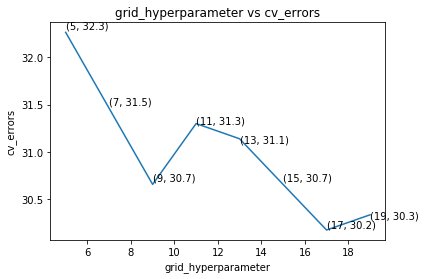

the best k-value is 17
Accuracy of train data 0.7399678972712681
Accuracy of test data 0.7052238805970149


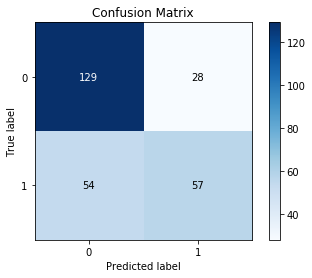

In [165]:
grid_hyperparameter = [{'n_neighbors':[5, 7, 9, 11, 13, 15, 17, 19]}]
print(grid_hyperparameter)

knn_model = GridSearchCV(KNN(algorithm = 'kd_tree'),grid_hyperparameter,scoring = 'accuracy', cv=3)
knn_model.fit(X_train,y_train)

#plot cv errors
errors = [(1-x[1])*100 for x in knn_model.grid_scores_]
plt.plot(grid_hyperparameter[0]['n_neighbors'],errors)
for xy in zip(grid_hyperparameter[0]['n_neighbors'],np.round(errors,1)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('grid_hyperparameter')
plt.ylabel('cv_errors')
plt.title('grid_hyperparameter vs cv_errors')
plt.show()

k = knn_model.best_estimator_.get_params()['n_neighbors']
knn_train_score = knn_model.score(X_train,y_train)
knn_test_score = knn_model.score(X_test, y_test)
print('the best k-value is',k)
print('Accuracy of train data',knn_train_score)
print('Accuracy of test data',knn_test_score)

knn_model = KNN(n_neighbors= 9,algorithm = 'kd_tree')
knn_model.fit(X_train,y_train)

pred = knn_model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)

# Naive Bayes

[{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1, 10, 100, 500]}]


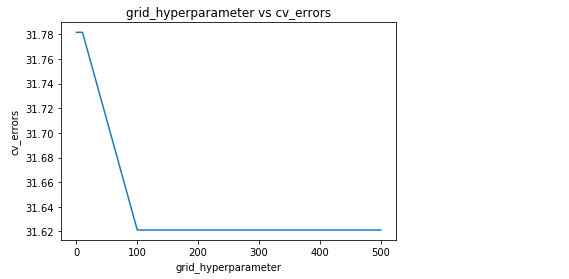

the best alpha-value is 100
Accuracy of train data 0.680577849117175
Accuracy of test data 0.7052238805970149


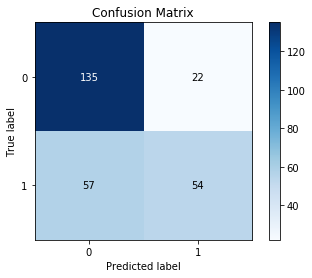

Features important for not survived Index(['Parch', 'SibSp'], dtype='object')
Features important for survived Index(['Sex', 'Parch'], dtype='object')


In [200]:
grid_hyperparameter = [{'alpha':[0.000001,0.00001, 0.0001, 0.001, 0.01, 1, 10, 100,500]}]
print(grid_hyperparameter)

NB_model = GridSearchCV(NB(),grid_hyperparameter,scoring = 'accuracy', cv=3)
NB_model.fit(X_train,y_train)

#plot cv errors
errors = [(1-x[1])*100 for x in NB_model.grid_scores_]
plt.plot(grid_hyperparameter[0]['alpha'],errors)
for xy in zip(grid_hyperparameter[0]['alpha'],np.round(errors,1)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('grid_hyperparameter')
plt.ylabel('cv_errors')
plt.title('grid_hyperparameter vs cv_errors')
plt.show()

alpha = NB_model.best_estimator_.get_params()['alpha']
NB_train_score = NB_model.score(X_train,y_train)
NB_test_score = NB_model.score(X_test, y_test)
print('the best alpha-value is',alpha)
print('Accuracy of train data',NB_train_score)
print('Accuracy of test data',NB_test_score)

NB_model = NB(alpha = alpha)
NB_model.fit(X_train,y_train)

pred = NB_model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)
plt.show()

#Features that are important in analysing people who could not survive
neg_probs = NB_model.feature_log_prob_[0, :].argsort()
print('Features important for not survived',np.take(X_train.columns, neg_probs[0:2]))

#Features that are important in analysing people who could survive
pos_probs = NB_model.feature_log_prob_[1, :].argsort()
print('Features important for survived',np.take(X_train.columns, pos_probs[0:2]))

# Logistic Regression

[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}]


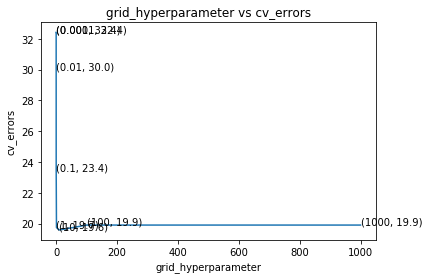

the best C-value is 100
Accuracy of train data 0.7961476725521669
Accuracy of test data 0.8059701492537313


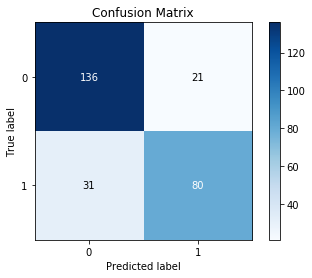

Important Features Index(['Sex', 'SibSp'], dtype='object')


In [204]:
grid_hyperparameter = [{'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]
print(grid_hyperparameter)

LR_model = GridSearchCV(LogisticRegression(penalty='l2'),grid_hyperparameter,scoring = 'accuracy', cv=3)
LR_model.fit(X_train,y_train)

#plot cv errors
errors = [(1-x[1])*100 for x in LR_model.grid_scores_]
plt.plot(grid_hyperparameter[0]['C'],errors)
for xy in zip(grid_hyperparameter[0]['C'],np.round(errors,1)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('grid_hyperparameter')
plt.ylabel('cv_errors')
plt.title('grid_hyperparameter vs cv_errors')
plt.show()

C = LR_model.best_estimator_.get_params()['C']
LR_train_score = LR_model.score(X_train,y_train)
LR_test_score = LR_model.score(X_test, y_test)
print('the best C-value is',alpha)
print('Accuracy of train data',LR_train_score)
print('Accuracy of test data',LR_test_score)

LR_model = LogisticRegression(penalty='l2',C= C)
LR_model.fit(X_train,y_train)

pred = LR_model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)
plt.show()

#Important Features
indx = LR_model.coef_.argsort()
print('Important Features',np.take(X_train.columns, indx[0][:2]))

# SVM

[{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1, 10, 100]}]


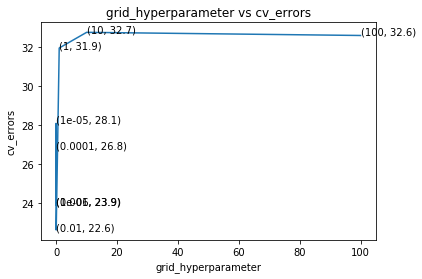

the best C-value is 100
Accuracy of train data 0.7752808988764045
Accuracy of test data 0.8022388059701493


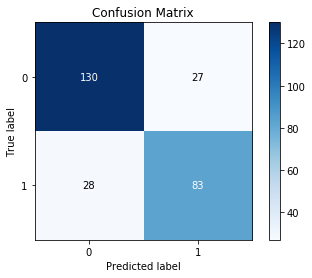

Important Features Index(['Sex', 'single'], dtype='object')


In [205]:
grid_hyperparameter = [{'alpha':[0.000001,0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]}]
print(grid_hyperparameter)

SVM_model = GridSearchCV(SGDClassifier(penalty='l2',loss='hinge',max_iter=1000),grid_hyperparameter,scoring = 'accuracy', cv=3)
SVM_model.fit(X_train,y_train)

#plot cv errors
errors = [(1-x[1])*100 for x in SVM_model.grid_scores_]
plt.plot(grid_hyperparameter[0]['alpha'],errors)
for xy in zip(grid_hyperparameter[0]['alpha'],np.round(errors,1)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('grid_hyperparameter')
plt.ylabel('cv_errors')
plt.title('grid_hyperparameter vs cv_errors')
plt.show()

SVM_alpha = SVM_model.best_estimator_.get_params()['alpha']
SVM_train_score = SVM_model.score(X_train,y_train)
SVM_test_score = SVM_model.score(X_test, y_test)
print('the best C-value is',alpha)
print('Accuracy of train data',SVM_train_score)
print('Accuracy of test data',SVM_test_score)

SVM_model = SGDClassifier(alpha = SVM_alpha,penalty='l2',loss='hinge',max_iter=1000)
SVM_model.fit(X_train,y_train)

pred = SVM_model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)
plt.show()

#Important Features
indx = SVM_model.coef_.argsort()
print('Important Features',np.take(X_train.columns, indx[0][:2]))

# Decision Tress

[{'max_depth': [1, 5, 10, 50, 100, 500, 100]}]


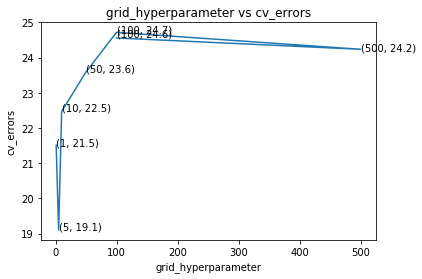

the best max_depth is 5
Accuracy of train data 0.85553772070626
Accuracy of test data 0.7947761194029851


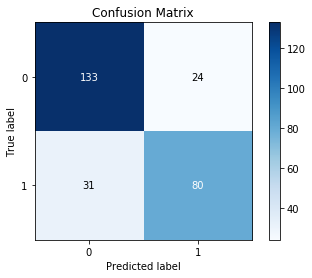

Important Features Index(['SibSp', 'single'], dtype='object')


In [214]:
grid_hyperparameter = [{'max_depth':[1, 5, 10, 50, 100, 500, 100]}]
print(grid_hyperparameter)

DT_model = GridSearchCV(DecisionTreeClassifier(),grid_hyperparameter,scoring = 'accuracy', cv=3)
DT_model.fit(X_train,y_train)

#plot cv errors
errors = [(1-x[1])*100 for x in DT_model.grid_scores_]
plt.plot(grid_hyperparameter[0]['max_depth'],errors)
for xy in zip(grid_hyperparameter[0]['max_depth'],np.round(errors,1)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('grid_hyperparameter')
plt.ylabel('cv_errors')
plt.title('grid_hyperparameter vs cv_errors')
plt.show()

DT_depth = DT_model.best_estimator_.get_params()['max_depth']
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test, y_test)
print('the best max_depth is',DT_depth)
print('Accuracy of train data',DT_train_score)
print('Accuracy of test data',DT_test_score)

DT_model = DecisionTreeClassifier(max_depth = DT_depth)
DT_model.fit(X_train,y_train)

pred = DT_model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)
plt.show()

#Important Features
indx = np.argsort(DT_model.feature_importances_)
print('Important Features',np.take(X_train.columns, indx[:2]))

# Random Forest

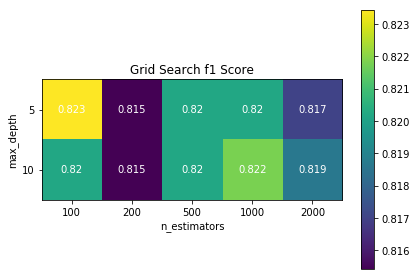

the best max_depth is 5
the best max_depth is 100
Accuracy of train data 0.869983948635634
Accuracy of test data 0.8134328358208955


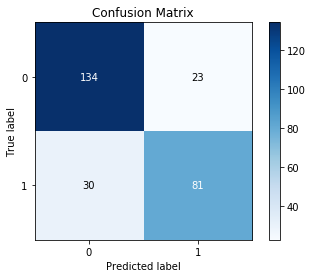

Important Features Index(['single', 'Parch'], dtype='object')


In [218]:
grid_hyperparameter = [{'n_estimators'  : [100, 200, 500, 1000, 2000],'max_depth':[5,10]}]
grid_hyperparameter

clf = GridSearchCV(RandomForestClassifier(criterion='gini'),grid_hyperparameter,scoring = 'accuracy', cv=3)
clf.fit(X_train,y_train)

n_estimators = grid_hyperparameter[0]['n_estimators']
max_depth = grid_hyperparameter[0]['max_depth']
df = pd.DataFrame(clf.grid_scores_)
scores = np.array(df['mean_validation_score']).reshape(2,5)
fig, ax = plt.subplots()
plt.imshow(scores, interpolation='nearest')
plt.colorbar()
for i in range(len(max_depth)):
    for j in range(len(n_estimators)):
        text = ax.text(j, i, np.round(scores[i, j],3),
                       ha="center", va="center", color="w")
ax.set_xticks(np.arange(len(n_estimators)))
ax.set_yticks(np.arange(len(max_depth)))
ax.set_xticklabels(n_estimators)
ax.set_yticklabels(max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
ax.set_title("Grid Search f1 Score")
fig.tight_layout()
plt.show()

clf_n = clf.best_estimator_.get_params()['n_estimators']
clf_depth = clf.best_estimator_.get_params()['max_depth']
clf_train_score = clf.score(X_train,y_train)
clf_test_score = clf.score(X_test, y_test)
print('the best max_depth is',clf_depth)
print('the best max_depth is',clf_n)
print('Accuracy of train data',clf_train_score)
print('Accuracy of test data',clf_test_score)

clf = RandomForestClassifier(class_weight = 'balanced',n_estimators=clf_n, criterion='gini', max_depth=clf_depth, random_state=42, n_jobs=-1)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)
plt.show()

#Important Features
indx = np.argsort(clf.feature_importances_)
print('Important Features',np.take(X_train.columns, indx[:2]))

# XGB

In [227]:
xg_n_estimator = clf.best_estimator_.get_params()['n_estimators']
xg_max_depths = clf.best_estimator_.get_params()['max_depth']
xg_train_score = clf.score(X_train,y_train)
xg_test_score = clf.score(X_test, y_test)
print('the best max_depth is',clf_depth)
print('the best max_depth is',clf_n)
print('Accuracy of train data',clf_train_score)
print('Accuracy of test data',clf_test_score)

[50, 100, 500, 1000, 2000]

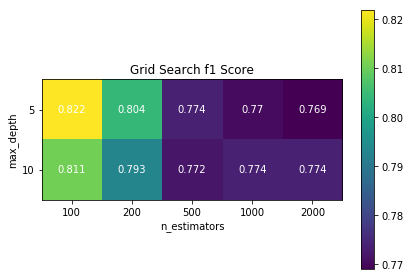

the best max_depth is 5
the best max_depth is 50
Accuracy of train data 0.8972712680577849
Accuracy of test data 0.7910447761194029


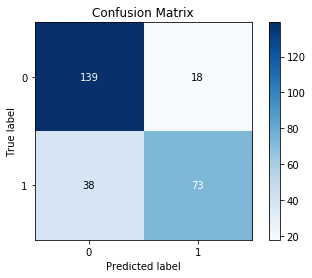

In [229]:
grid_hyperparameter = [{'n_estimators'  : [50,100,500,1000,2000],'max_depth':[5,10]}]

clf_XG = GridSearchCV(XGBClassifier(), grid_hyperparameter,scoring = 'accuracy',cv=3)
clf_XG.fit(X_train,y_train)

xg_n_estimators = grid_hyperparameter[0]['n_estimators']
xg_max_depth = grid_hyperparameter[0]['max_depth']
df = pd.DataFrame(clf_XG.grid_scores_)
scores = np.array(df['mean_validation_score']).reshape(2,5)
fig, ax = plt.subplots()
plt.imshow(scores, interpolation='nearest')
plt.colorbar()
for i in range(len(max_depth)):
    for j in range(len(n_estimators)):
        text = ax.text(j, i, np.round(scores[i, j],3),
                       ha="center", va="center", color="w")
ax.set_xticks(np.arange(len(n_estimators)))
ax.set_yticks(np.arange(len(max_depth)))
ax.set_xticklabels(n_estimators)
ax.set_yticklabels(max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
ax.set_title("Grid Search f1 Score")
fig.tight_layout()
plt.show()

xg_n_estimator = clf_XG.best_estimator_.get_params()['n_estimators']
xg_max_depths = clf_XG.best_estimator_.get_params()['max_depth']
xg_train_score = clf_XG.score(X_train,y_train)
xg_test_score = clf_XG.score(X_test, y_test)
print('the best max_depth is',xg_max_depths)
print('the best max_depth is',xg_n_estimator)
print('Accuracy of train data',xg_train_score)
print('Accuracy of test data',xg_test_score)


clf = XGBClassifier(class_weight = 'balanced',n_estimators=xg_n_estimator, criterion='gini', max_depth=xg_max_depths, random_state=42, n_jobs=-1)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False)
plt.show()

# MLP

In [235]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [264]:
output_dim = 1
input_dim = X_train.shape[1]
batch_size = 32 
nb_epoch = 5

In [265]:
model_drop = Sequential()

model_drop.add(Dense(10,activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(10 ,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='sigmoid'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                100       
_________________________________________________________________
batch_normalization_7 (Batch (None, 10)                40        
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_8 (Batch (None, 10)                40        
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total para

In [266]:
model_drop.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

score = model_drop.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 623 samples, validate on 268 samples
Epoch 1/5
623/623 [==============================] - 1s 2ms/step - loss: 1.0106 - acc: 0.4928 - val_loss: 0.6834 - val_acc: 0.6045
Epoch 2/5
623/623 [==============================] - 0s 73us/step - loss: 0.9237 - acc: 0.5152 - val_loss: 0.6449 - val_acc: 0.7276
Epoch 3/5
623/623 [==============================] - 0s 70us/step - loss: 0.7800 - acc: 0.5811 - val_loss: 0.6303 - val_acc: 0.7052
Epoch 4/5
623/623 [==============================] - 0s 67us/step - loss: 0.7819 - acc: 0.5570 - val_loss: 0.6200 - val_acc: 0.6940
Epoch 5/5
623/623 [==============================] - 0s 70us/step - loss: 0.8060 - acc: 0.6003 - val_loss: 0.6176 - val_acc: 0.7127
Test score: 0.6175802928298267
Test accuracy: 0.7126865662745575


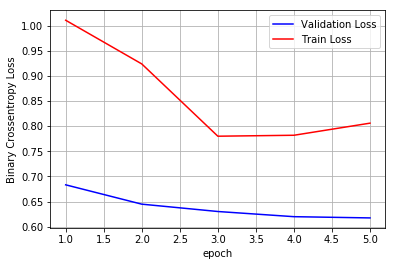

In [268]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

# Summary

In [267]:
from prettytable import PrettyTable
    
Table = PrettyTable()

Table.field_names  = ["Model", "Hyper_parameter", "Train score", "Test score"]

Table.add_row(["KNN", k, knn_train_score,knn_test_score])
Table.add_row(["Naive bayes", alpha,NB_train_score, NB_test_score])
Table.add_row(["Logistic Regression", C,LR_train_score, LR_test_score])
Table.add_row(["SVM", SVM_alpha,SVM_train_score, SVM_test_score])
Table.add_row(["Decision Tree", DT_depth,DT_train_score, DT_test_score])
Table.add_row(["Random Forest", [clf_n,clf_depth],clf_train_score, clf_test_score])
Table.add_row(["XGB", [xg_n_estimator,xg_max_depths],xg_train_score, xg_test_score])
Table.add_row(["MLP","",score[0], score[1]])

print(Table)

+---------------------+-----------------+--------------------+--------------------+
|        Model        | Hyper_parameter |    Train score     |     Test score     |
+---------------------+-----------------+--------------------+--------------------+
|         KNN         |        17       | 0.7399678972712681 | 0.7052238805970149 |
|     Naive bayes     |       100       | 0.680577849117175  | 0.7052238805970149 |
| Logistic Regression |        10       | 0.7961476725521669 | 0.8059701492537313 |
|         SVM         |       0.01      | 0.7752808988764045 | 0.8022388059701493 |
|    Decision Tree    |        5        |  0.85553772070626  | 0.7947761194029851 |
|    Random Forest    |     [100, 5]    | 0.869983948635634  | 0.8134328358208955 |
|         XGB         |     [50, 5]     | 0.8972712680577849 | 0.7910447761194029 |
|         MLP         |                 | 0.6175802928298267 | 0.7126865662745575 |
+---------------------+-----------------+--------------------+--------------